##Warning: Import entree_data.tar.gz before executing



In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark
!tar xf entree_data.tar.gz


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"
import matplotlib.pyplot as plt


In [ ]:
import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext("local")


In [ ]:
!ls

entree		    sample_data		       spark-2.4.7-bin-hadoop2.7.tgz
entree_data.tar.gz  spark-2.4.7-bin-hadoop2.7


In [ ]:
print(sc)
print(sc.appName)
resto=[]

<SparkContext master=local appName=pyspark-shell>
pyspark-shell


In [ ]:
def stream(s, city):
  for i in sess:
    if(i[0]==city):
      popularity = i[1].count(s[0])
  return (s[1], s[2].split(), city,  s[0],popularity)

In [ ]:


obj = {'Atlanta': [], 'Boston': [], 'Chicago':[], 'Los Angeles':[], 'New Orleans':[], 'New York':[], 'San Francisco':[], 'Washington D.C.':[]}

def trail(x):
  if len(x)==1:
    return "000000"+x
  elif len(x)==2:
    return "00000"+x
  elif len(x)==3:
    return "0000"+x

def locmap(x):
    if(x[-1]=='A'):
      return ('Atlanta',trail(x[:-1]))
    elif(x[-1]=='B'):
      return ('Boston',trail(x[:-1]))
    elif(x[-1]=='C'):
      return ('Chicago',trail(x[:-1]))
    elif(x[-1]=='E'):
      return ('New Orleans',trail(x[:-1]))
    elif(x[-1]=='F'):
      return ('New York',trail(x[:-1]))
    elif(x[-1]=='G'):
      return ('San Francisco',trail(x[:-1]))
    elif(x[-1]=='D'):
      return ('Los Angeles',trail(x[:-1]))
    elif(x[-1]=='H'):
      return ('Washington D.C.',trail(x[:-1]))

def to_list(a):
    return [a]

def append(a, b):
    a.append(b)
    return a

def extend(a, b):
    a.extend(b)
    return a

sess = sc.textFile("entree/session/session.19*").map(lambda s: s.split("\t")).map(lambda s: s[2])
print(sess.count())
sess = sess.filter(lambda x: x[0]!='0')


print(sess.count())
sess = sc.parallelize(sess.map(lambda x: locmap(x)).collect())
sess=sess.combineByKey(to_list, append, extend).collect()

print(sess)

50672
5995
[('Chicago', ['0000148', '0000105', '0000162', '0000163', '0000086', '0000192', '0000640', '0000133', '0000595', '0000447', '0000192', '0000592', '0000095', '0000137', '0000035', '0000035', '0000655', '0000017', '0000665', '0000035', '0000099', '0000543', '0000486', '0000486', '0000529', '0000246', '0000034', '0000134', '0000192', '0000017', '0000341', '0000167', '0000014', '0000418', '0000200', '0000001', '0000452', '0000449', '0000469', '0000153', '0000217', '0000441', '0000097', '0000560', '0000334', '0000407', '0000350', '0000460', '0000050', '0000369', '0000227', '0000010', '0000086', '0000164', '0000227', '0000227', '0000164', '0000197', '0000371', '0000037', '0000384', '0000387', '0000407', '0000112', '0000017', '0000107', '0000134', '0000613', '0000192', '0000070', '0000377', '0000387', '0000316', '0000227', '0000400', '0000265', '0000262', '0000418', '0000400', '0000595', '0000035', '0000586', '0000090', '0000203', '0000644', '0000644', '0000041', '0000044', '000019

In [ ]:
atlanta = sc.textFile('entree/data/atlanta.txt')
atlanta = atlanta.map(lambda s: s.split('\t')).map(lambda s:stream(s, 'Atlanta'))
resto.append(atlanta.count())
boston = sc.textFile('entree/data/boston.txt')
boston = boston.map(lambda s: s.split('\t')).map(lambda s: stream(s, 'Boston'))
resto.append(boston.count())
chicago = sc.textFile('entree/data/chicago.txt')
chicago = chicago.map(lambda s: s.split('\t')).map(lambda s: stream(s, 'Chicago'))
resto.append(chicago.count())
los_angeles = sc.textFile('entree/data/los_angeles.txt')
los_angeles = los_angeles.map(lambda s: s.split('\t')).map(lambda s: stream(s, 'Los Angeles'))
resto.append(los_angeles.count())
new_orleans = sc.textFile('entree/data/new_orleans.txt')
new_orleans = new_orleans.map(lambda s: s.split('\t')).map(lambda s: stream(s, 'New Orleans'))
resto.append(new_orleans.count())
new_york = sc.textFile('entree/data/new_york.txt')
new_york = new_york.map(lambda s: s.split('\t')).map(lambda s: stream(s, 'New York'))
resto.append(new_york.count())
san_francisco = sc.textFile('entree/data/san_francisco.txt')
san_francisco = san_francisco.map(lambda s: s.split('\t')).map(lambda s: stream(s, 'San Francisco'))
resto.append(san_francisco.count())
washington_dc = sc.textFile('entree/data/washington_dc.txt')
washington_dc = washington_dc.map(lambda s: s.split('\t')).map(lambda s: stream(s, 'Washington D.C.'))
resto.append(washington_dc.count())





print(atlanta.count()+ boston.count()+chicago.count()+ los_angeles.count()+new_orleans.count()+new_york.count()+san_francisco.count()+washington_dc.count())
final = sc.union([atlanta,boston, chicago, los_angeles, new_orleans, new_york, san_francisco, washington_dc]).filter(lambda s: "(" not in s[0]).sortBy(lambda x: x[0].strip())

final.take(10)



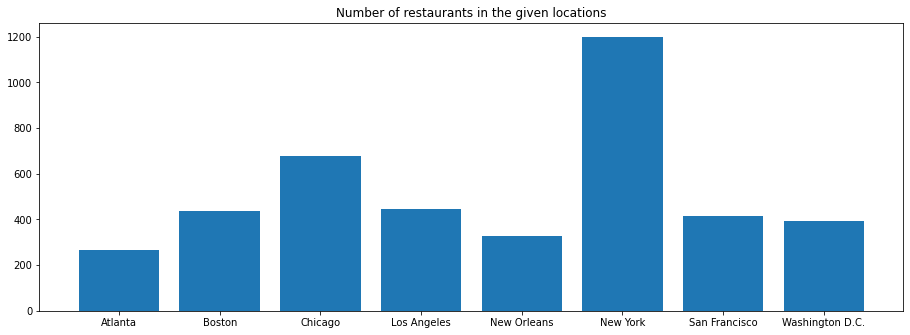

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
cities = ['Atlanta', 'Boston', 'Chicago', 'Los Angeles', 'New Orleans', 'New York', 'San Francisco', 'Washington D.C.']
ax.bar(cities,resto)
ax.set_title('Number of restaurants in the given locations')

plt.show()

In [ ]:
features = sc.textFile('entree/data/features.txt').map(lambda x: x.split("\t"))
features.collect()

[['000', 'A'],
 ['001', 'Authentic'],
 ['002', 'Afghanistan'],
 ['003', 'African'],
 ['004', 'After Hours Dining'],
 ['005', 'American (Contemporary)'],
 ['006', 'American (New)'],
 ['007', 'American (Regional)'],
 ['008', 'American (Traditional)'],
 ['009', 'American'],
 ['010', 'An Historic Spot'],
 ['011', 'An Out Of The Way Find'],
 ['012', 'Argentinean'],
 ['013', 'Armenian'],
 ['014', 'Asian'],
 ['015', 'Austrian'],
 ['016', 'Bakeries'],
 ['017', 'Bar-B-Q'],
 ['018', 'Belgian'],
 ['019', 'Brasserie'],
 ['020', 'Brazilian'],
 ['021', 'Buffet Dining'],
 ['022', 'Burmese'],
 ['023', 'Burritos'],
 ['024', 'Business Scene'],
 ['025', 'Creative'],
 ['026', 'Cab'],
 ['027', 'Cafe/Espresso Bars'],
 ['028', 'Cafe/Garden Dining'],
 ['029', 'Cafeterias'],
 ['030', 'Cajun'],
 ['031', 'Californian'],
 ['032', 'Cambodian'],
 ['033', 'Canadian'],
 ['034', 'Caribbean'],
 ['035', 'Carry in Wine and Beer'],
 ['036', 'Catering for Special Events'],
 ['037', 'Caviar'],
 ['038', 'Central'],
 ['039', 

In [ ]:
print("Input list of features wanted")
lis = input().split()
print("Enter a number for location\n1. Atlanta\n2. Boston\n3. Chicago\n4. Los Angeles\n5. New Orleans\n6. New York\n7. San Francisco\n8. Washington D.C.")
location = int(input())-1
# arr = ['Atlanta', 'Boston', 'Chicago', 
#       'Los Angeles', 'New Orleans', 'New York',
#        'San Francisco', 'Washington D.C.']
def score(x,lis):
  return   len( [value for value in lis if value in x[1]] )
  


temp = final.map(lambda x: (x[0],  score(x,lis), x[2], x[4])).filter(lambda x: x[1] !=0 and x[2]==cities[location]).sortBy(lambda x: (x[1], x[3]),ascending= False )#.sortBy(lambda x:x[-1], ascending = False)
print("Hotels with at least one feature matching" + str( temp.count()))
temp.take(10)


Input list of features wanted
164 053 253
Enter a number for location
1. Atlanta
2. Boston
3. Chicago
4. Los Angeles
5. New Orleans
6. New York
7. San Francisco
8. Washington D.C.
1
Hotels with at least one feature matching224


[("Houston's", 3, 'Atlanta', 5),
 ("Babette's Cafe", 3, 'Atlanta', 2),
 ('Chile Tree', 3, 'Atlanta', 1),
 ('Haveli', 3, 'Atlanta', 1),
 ('Longhorn Steaks', 3, 'Atlanta', 1),
 ('Outback Steaks', 3, 'Atlanta', 1),
 ('SURIN OF THAILAND', 3, 'Atlanta', 1),
 ("Altobeli's Fine Italian Cuisine", 3, 'Atlanta', 0),
 ('August Moon', 3, 'Atlanta', 0),
 ('Azio', 3, 'Atlanta', 0)]